### Code for Marine heatwave at coordinate(lat,lon)

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc

In [3]:
def mhw(u,v):
    dataset = xr.open_dataset("subset.nc", engine="netcdf4")
    
    Time=dataset.sst.time[:14368].data      #1D ##removin year 2021 from the data
    Latitude=dataset.sst.lat.data     #1D
    Longitude=dataset.sst.lon.data    #1D
    sea_surface_temp=dataset.sst.data 
    
    TimeDF=pd.DataFrame(Time,columns=['Time'])
    sea_surface_tempDF=pd.DataFrame(sea_surface_temp[:14368,u,v],columns=['sea_surface_temp'])
    time_sst=pd.concat([TimeDF,sea_surface_tempDF],axis=1)
    
    
    ## Finding 90 percentile for each lat,lon pair and storing in a list,further we will convert this list into 2d array 
    percentile_list=[]
    for i in range(0,100):
        for j in range(0,160):
            percentile_list.append(np.percentile(dataset.sst[:14368,i,j].data,90))
            
            
    nintey_percentile=np.array(percentile_list).reshape(100,160) #reshaping into original format
    ## Hence we got the value of 90 percentile with the help of lat 40 year data for everylat lon pair(1981-2020)
    
    dataset21=xr.open_dataset("sst.day.mean.2021.nc", engine="netcdf4") ## SST data for 2021
    
    datasetsst21=dataset21.sst.sel(lon=slice(60,100),lat=slice(0,25)) ##Indian Ocean Slicing
    
    ## marking boolean for all sst greater then 90 percentile
    x=[]
    for k in range(len(datasetsst21.time.data)):
        x.append(np.greater(datasetsst21[k].data,nintey_percentile))
        
    ## converting 2d list into 3d array and bool into binary(1,0)
    logic_mhw=np.array(x).astype(int)
    
    ## creating a dataArray with bool
    logic_mhw_xr=xr.DataArray(logic_mhw, coords=[("time",datasetsst21.time.data),("lat", Latitude), ("lon", Longitude)])
    
    ## converting in time series
    new_table=pd.concat([pd.DataFrame(logic_mhw_xr.time.data,columns=['Time']),pd.DataFrame(logic_mhw[:,0,0],columns=['logic_mhw'])],axis=1)
    new_table['logic_mhw'].value_counts() ## value greater then 5 henve there is chance of detecting mhw
    
    new_table.plot(x='Time',y='logic_mhw',kind='line')

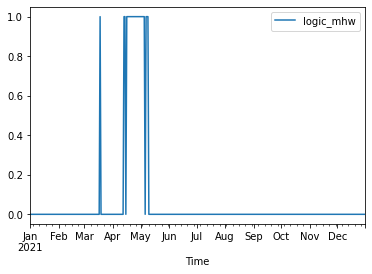

In [4]:
mhw(0,0)